In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pickle


%matplotlib inline



In [3]:
#Define function for getting data frame from MTA url

def get_data(week_ids):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs_by_week = []
    for week_id in week_ids:
        file_url = url.format(week_id)
        dfs_by_week.append(pd.read_csv(file_url))
    return pd.concat(dfs_by_week)

In [4]:
week_ids = [180616, 180609, 180602, 170617, 170610, 170603, 160618, 160611, 160604, 150620, 150613, 150606]

In [4]:
#import pickle
#filename = 'turnstiles.pkl'
#try:
#    with open(filename,'rb') as pklfile:
#        df = pickle.load(pklfile)
#except:
#    df = get_data(week_ids)
#    with open(filename,'wb') as pklfile:
#        df = pickle.dump(df, pklfile)

In [5]:
df = get_data(week_ids)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,00:00:00,REGULAR,6649975,2254182
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,04:00:00,REGULAR,6650004,2254188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,08:00:00,REGULAR,6650022,2254209
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,12:00:00,REGULAR,6650118,2254289
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,16:00:00,REGULAR,6650332,2254345


In [6]:
#Strip column names
df.rename(columns={column:column.strip() for column in df.columns}, inplace=True)
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [7]:
np.sort(df['STATION'].unique())

array(['1 AV', '1 AVE', '103 ST', '103 ST-CORONA', '104 ST', '110 ST',
       '110 ST-CATHEDRL', '110 ST-CPN', '111 ST', '116 ST',
       '116 ST-COLUMBIA', '121 ST', '125 ST', '135 ST', '137 ST CITY COL',
       '137 ST-CITY COL', '138 ST-3 AVE', '138 ST-GR CONC',
       '138/GRAND CONC', '14 ST', '14 ST-6 AVE', '14 ST-UNION SQ',
       '145 ST', '148 ST-LENOX', '149 ST-3 AVE', '149 ST-GR CONC',
       '149/GRAND CONC', '14TH STREET', '15 ST-PROSPECT', '155 ST',
       '157 ST', '161 ST-YANKEE', '161/YANKEE STAD', '163 ST-AMSTERDM',
       '167 ST', '168 ST', '168 ST-BROADWAY', '169 ST', '170 ST',
       '174 ST', '174-175 ST', '174-175 STS', '175 ST', '176 ST', '18 AV',
       '18 AVE', '18 ST', '181 ST', '182-183 ST', '182-183 STS', '183 ST',
       '190 ST', '191 ST', '2 AV', '2 AVE', '20 AV', '20 AVE', '207 ST',
       '21 ST', '21 ST-QNSBRIDGE', '215 ST', '219 ST', '22 AVE-BAY PKY',
       '225 ST', '23 ST', '23 ST-5 AVE', '23 ST-6 AVE', '231 ST',
       '233 ST', '238 ST', '242 

In [8]:
#Av + Ave doubled, how do we fix this?
#for station_name in df['STATION'].unique():
#    if station_name[-1] == 'V':
#        df[station_name + 'E'] += df[station_name]
#df

In [7]:
#Need date time
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, format="%m/%d/%Y %H:%M:%S")
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,00:00:00,REGULAR,6649975,2254182,2018-06-09 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,04:00:00,REGULAR,6650004,2254188,2018-06-09 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,08:00:00,REGULAR,6650022,2254209,2018-06-09 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,12:00:00,REGULAR,6650118,2254289,2018-06-09 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,16:00:00,REGULAR,6650332,2254345,2018-06-09 16:00:00


In [9]:
df['ENTRIES_COUNT'] = df['ENTRIES'].diff()

In [10]:
df['EXITS_COUNT'] = df['EXITS'].diff()

In [16]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,ENTRIES_COUNT,EXITS_COUNT
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,04:00:00,REGULAR,6650004,2254188,2018-06-09 04:00:00,29.0,6.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,08:00:00,REGULAR,6650022,2254209,2018-06-09 08:00:00,18.0,21.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,12:00:00,REGULAR,6650118,2254289,2018-06-09 12:00:00,96.0,80.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,16:00:00,REGULAR,6650332,2254345,2018-06-09 16:00:00,214.0,56.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,20:00:00,REGULAR,6650579,2254378,2018-06-09 20:00:00,247.0,33.0


In [13]:
#Check to not drop other null values
df.isnull().sum()

C/A              0
UNIT             0
SCP              0
STATION          0
LINENAME         0
DIVISION         0
DATE             0
TIME             0
DESC             0
ENTRIES          0
EXITS            0
DATE_TIME        0
ENTRIES_COUNT    1
EXITS_COUNT      1
dtype: int64

In [12]:
#Drop the null values introduced by count
df.dropna(inplace=True)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,ENTRIES_COUNT,EXITS_COUNT
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,04:00:00,REGULAR,6650004,2254188,2018-06-09 04:00:00,29.0,6.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,08:00:00,REGULAR,6650022,2254209,2018-06-09 08:00:00,18.0,21.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,12:00:00,REGULAR,6650118,2254289,2018-06-09 12:00:00,96.0,80.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,16:00:00,REGULAR,6650332,2254345,2018-06-09 16:00:00,214.0,56.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,20:00:00,REGULAR,6650579,2254378,2018-06-09 20:00:00,247.0,33.0


In [15]:
#Entries count whacky
df.sort_values('ENTRIES_COUNT')

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,ENTRIES_COUNT,EXITS_COUNT
149831,R238A,R046,02-00-04,GRD CNTRL-42 ST,4567S,IRT,06/11/2016,00:00:00,REGULAR,41453,1455,2016-06-11 00:00:00,-2.147438e+09,-1.555900e+04
59666,N103,R127,00-02-01,JAY ST-METROTEC,ACF,IND,05/28/2016,00:00:00,REGULAR,3862967,414695,2016-05-28 00:00:00,-2.139491e+09,-6.957818e+07
60138,N103,R127,00-02-01,JAY ST-METROTEC,ACF,IND,06/04/2016,00:00:00,REGULAR,3881558,416256,2016-06-04 00:00:00,-2.139464e+09,-6.958147e+07
60215,N103,R127,00-02-01,JAY ST-METROTEC,ACF,IND,06/11/2016,00:00:00,REGULAR,3901992,418125,2016-06-11 00:00:00,-2.139436e+09,-6.958452e+07
52550,N078,R175,01-03-01,14 ST,ACEL,IND,05/27/2017,01:00:00,REGULAR,11736005,14033392,2017-05-27 01:00:00,-2.118720e+09,-1.143268e+09
66210,N138,R355,01-04-00,GREENWOOD-111,A,IND,06/13/2015,01:00:00,REGULAR,723,0,2015-06-13 01:00:00,-2.118713e+09,-1.565786e+09
52845,N078,R175,01-03-01,14 ST,ACEL,IND,06/03/2017,01:00:00,REGULAR,11749901,14047741,2017-06-03 01:00:00,-2.118695e+09,-1.143238e+09
52762,N078,R175,01-03-01,14 ST,ACEL,IND,06/10/2017,01:00:00,REGULAR,11766257,14063808,2017-06-10 01:00:00,-2.118668e+09,-1.143206e+09
53202,N078,R175,01-03-01,14 ST,ACEL,IND,05/26/2018,01:00:00,REGULAR,12529481,14824993,2018-05-26 01:00:00,-2.117370e+09,-1.141688e+09
53313,N078,R175,01-03-01,14 ST,ACEL,IND,06/02/2018,01:00:00,REGULAR,12544255,14839026,2018-06-02 01:00:00,-2.117343e+09,-1.141658e+09


In [16]:
#How wacky?
(abs(df['ENTRIES_COUNT']) > 100000).value_counts()

False    2288877
True       49814
Name: ENTRIES_COUNT, dtype: int64

In [17]:
#Pretty wacky -- exits too
(abs(df['EXITS_COUNT']) > 100000).value_counts()

False    2290788
True       47903
Name: EXITS_COUNT, dtype: int64

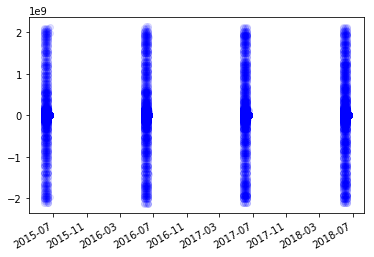

In [18]:
#Let's see if we can't get a visual on just how whacky we're talking
#What's up with the 16th and the 23rd -- are Saturdays really that much busier?
#Considering its showing +/- 1/4 of the earth's population, probably not

#Formatting for x-axis found here https://matplotlib.org/gallery/recipes/common_date_problems.html
fig, ax = plt.subplots()
ax.plot(df.DATE_TIME, df.ENTRIES_COUNT, 'bo', alpha=.1)

fig.autofmt_xdate()

ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

In [14]:
#Based on the function from the lecture -- would like to replace high counts with average from prev rather than 0
#Switched to return none to hand off to interpolate

def count_cleaner(row, max_counter, column_name):
    counter = row[column_name]
    if abs(counter) > max_counter:
        #past_list = []
        #date_time = row['DATE_TIME']
        #date_time.replace(year=2018)
        #for years in range(1,5): 
        #    past_count = (df.loc[row[date_time] + pd.tseries.offsets.DateOffset(weeks=(-52 * years))]).column_name
        #    if past_count < max_counter:
        #        past_list.append(past_count)
        #if not past_list:
        #    return 0
        #else:
        #    counter = np.mean(past_list)
        return None
    elif counter < 0:
        counter = -counter
    return counter

#Originally picked 15000 as max since thats a bit over 1 person/sec, any more than that seems pretty unreasonable
#After graphing, the eyeball test shows 5000 is a better limit

df['EXITS_COUNT'] = df.apply(count_cleaner, axis=1, max_counter= 5000, column_name='EXITS_COUNT')
df['ENTRIES_COUNT'] = df.apply(count_cleaner, axis=1, max_counter = 5000, column_name='ENTRIES_COUNT')
df.interpolate(inplace=True)

df.sort_values('ENTRIES_COUNT', ascending=False)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,ENTRIES_COUNT,EXITS_COUNT
131750,R161B,R452,00-05-01,72 ST,123,IRT,05/30/2015,01:00:00,REGULAR,0,1455,2015-05-30 01:00:00,4992.0,1455.0
136813,R165,R167,01-00-00,86 ST,1,IRT,06/08/2017,17:00:00,REGULAR,157,260,2017-06-08 17:00:00,4983.0,NaN
88856,N408A,R256,00-03-00,NASSAU AV,G,IND,05/30/2015,00:00:00,REGULAR,444253,99316,2015-05-30 00:00:00,4978.0,NaN
120086,PTH20,R549,03-01-02,NEWARK HM HE,1,PTH,06/03/2017,01:42:22,REGULAR,89733,829152,2017-06-03 01:42:22,4957.0,NaN
121148,PTH22,R540,02-02-07,PATH NEW WTC,1,PTH,06/10/2017,00:36:27,REGULAR,20193,8542,2017-06-10 00:36:27,4940.0,3952.0
144426,R205A,R014,04-02-00,FULTON ST,2345ACJZ,IRT,06/09/2018,01:00:00,REGULAR,1534841,1081271,2018-06-09 01:00:00,4932.0,NaN
69581,N208,R443,01-00-02,170 ST,BD,IND,06/10/2017,01:00:00,REGULAR,9693,1961,2017-06-10 01:00:00,4926.0,999.0
153112,R238A,R046,02-03-02,GRD CNTRL-42 ST,4567S,IRT,06/03/2017,00:00:00,REGULAR,36,28,2017-06-03 00:00:00,4917.0,1415.0
11872,A081,R028,04-00-03,FULTON ST,ACJZ2345,BMT,06/13/2015,03:00:00,RECOVR AUD,275599,689265,2015-06-13 03:00:00,4908.0,NaN
119319,PTH20,R549,03-01-04,NEWARK HM HE,1,PTH,06/11/2016,03:05:02,REGULAR,16386,381268,2016-06-11 03:05:02,4890.0,NaN


In [15]:
df.interpolate(inplace=True)

In [17]:
df.sort_values('ENTRIES_COUNT', ascending=False)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,ENTRIES_COUNT,EXITS_COUNT
131750,R161B,R452,00-05-01,72 ST,123,IRT,05/30/2015,01:00:00,REGULAR,0,1455,2015-05-30 01:00:00,4992.0,1455.0
136813,R165,R167,01-00-00,86 ST,1,IRT,06/08/2017,17:00:00,REGULAR,157,260,2017-06-08 17:00:00,4983.0,431.5
88856,N408A,R256,00-03-00,NASSAU AV,G,IND,05/30/2015,00:00:00,REGULAR,444253,99316,2015-05-30 00:00:00,4978.0,146.5
120086,PTH20,R549,03-01-02,NEWARK HM HE,1,PTH,06/03/2017,01:42:22,REGULAR,89733,829152,2017-06-03 01:42:22,4957.0,148.0
121148,PTH22,R540,02-02-07,PATH NEW WTC,1,PTH,06/10/2017,00:36:27,REGULAR,20193,8542,2017-06-10 00:36:27,4940.0,3952.0
144426,R205A,R014,04-02-00,FULTON ST,2345ACJZ,IRT,06/09/2018,01:00:00,REGULAR,1534841,1081271,2018-06-09 01:00:00,4932.0,7.0
69581,N208,R443,01-00-02,170 ST,BD,IND,06/10/2017,01:00:00,REGULAR,9693,1961,2017-06-10 01:00:00,4926.0,999.0
153112,R238A,R046,02-03-02,GRD CNTRL-42 ST,4567S,IRT,06/03/2017,00:00:00,REGULAR,36,28,2017-06-03 00:00:00,4917.0,1415.0
11872,A081,R028,04-00-03,FULTON ST,ACJZ2345,BMT,06/13/2015,03:00:00,RECOVR AUD,275599,689265,2015-06-13 03:00:00,4908.0,30.5
182916,R605,R456,00-00-03,HOYT ST,23,IRT,05/28/2016,00:00:00,REGULAR,137650,136293,2016-05-28 00:00:00,4890.0,36.5


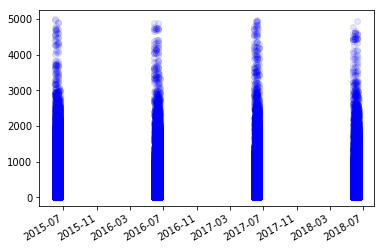

In [23]:
#Still pretty whacky though -- 
fig, ax = plt.subplots()
ax.plot(df.DATE_TIME, df.ENTRIES_COUNT, 'bo', alpha=.1)

fig.autofmt_xdate()

ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

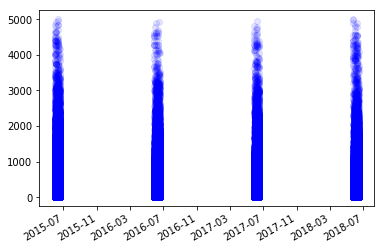

In [24]:
fig, ax = plt.subplots()
ax.plot(df.DATE_TIME, df.EXITS_COUNT, 'bo', alpha=.1)

fig.autofmt_xdate()

ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

In [ ]:
#Just from eyeballing looks like 5000 is a more reasonable filter from the peaks
#Some danger here with throwing out the stations we really need since we're tossing the highest counts
#But the days with the data we're dropping still have other points up there, so it may even out?
#This also will be helped if I can do get the function to replace with a median instead of 0s

#df["EXITS_COUNT"] = df.apply(count_cleaner, axis=1, max_counter= 5000, column_name='EXITS_COUNT')
#df['ENTRIES_COUNT'] = df.apply(count_cleaner, axis=1, max_counter = 5000, column_name='ENTRIES_COUNT')

In [ ]:
#Let's have a look
#fig, ax = plt.subplots()
#ax.plot(df.DATE_TIME, df.ENTRIES_COUNT, 'bo', alpha=.1)

#fig.autofmt_xdate()

#ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

In [ ]:
#These look a bit better -- might be that some of these outliers end up in our reccommendations but we can fine tune

#fig, ax = plt.subplots()
#ax.plot(df.DATE_TIME, df.EXITS_COUNT, 'bo', alpha=.1)

#fig.autofmt_xdate()

#ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

In [18]:
#Now let's create total foot traffic as a measure -- people going in and out of the station are all gonna pass by

df['FTRAFFIC'] = df.EXITS_COUNT + df.ENTRIES_COUNT
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,ENTRIES_COUNT,EXITS_COUNT,FTRAFFIC
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,04:00:00,REGULAR,6650004,2254188,2018-06-09 04:00:00,29.0,6.0,35.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,08:00:00,REGULAR,6650022,2254209,2018-06-09 08:00:00,18.0,21.0,39.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,12:00:00,REGULAR,6650118,2254289,2018-06-09 12:00:00,96.0,80.0,176.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,16:00:00,REGULAR,6650332,2254345,2018-06-09 16:00:00,214.0,56.0,270.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,20:00:00,REGULAR,6650579,2254378,2018-06-09 20:00:00,247.0,33.0,280.0


In [ ]:
#So here's our top 10 by ID, gotta get groupby going still

#df.sort_values('FTRAFFIC', ascending=False).head(10)


In [ ]:
#df.groupby(['STATION', 'DATE_TIME']).sum().sort_values('FTRAFFIC', ascending=False)

In [59]:
#For graphing purposes let's make all the data the same year and do groupby with averaging

df_proj = df
df_proj['NEXT_YEAR_PROJECTION'] = df['DATE_TIME'].apply(lambda dt_obj : dt_obj.replace(year=2019))
df_proj.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,ENTRIES_COUNT,EXITS_COUNT,FTRAFFIC,NEXT_YEAR_PROJECTION
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,04:00:00,REGULAR,6650004,2254188,2018-06-09 04:00:00,29.0,6.0,35.0,2019-06-09 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,08:00:00,REGULAR,6650022,2254209,2018-06-09 08:00:00,18.0,21.0,39.0,2019-06-09 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,12:00:00,REGULAR,6650118,2254289,2018-06-09 12:00:00,96.0,80.0,176.0,2019-06-09 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,16:00:00,REGULAR,6650332,2254345,2018-06-09 16:00:00,214.0,56.0,270.0,2019-06-09 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,20:00:00,REGULAR,6650579,2254378,2018-06-09 20:00:00,247.0,33.0,280.0,2019-06-09 20:00:00


In [60]:
#So lets's take the average across the years we've got so we can visualize this foot traffic data
df_proj = df_proj.groupby(['NEXT_YEAR_PROJECTION', 'STATION']).mean()
df_proj = df_proj.reset_index()
df_proj.head()

,NEXT_YEAR_PROJECTION,STATION,ENTRIES,EXITS,ENTRIES_COUNT,EXITS_COUNT,FTRAFFIC
0,2019-05-26,1 AV,3.037251e+08,1.625163e+08,369.550000,442.350000,811.900000
1,2019-05-26,103 ST-CORONA,7.237141e+06,7.461842e+06,169.888889,326.444444,496.333333
2,2019-05-26,104 ST,5.380305e+08,3.909676e+08,29.222222,48.111111,77.333333
3,2019-05-26,110 ST,5.757878e+06,5.557997e+06,203.250000,340.583333,543.833333
4,2019-05-26,111 ST,7.303054e+06,4.976249e+06,110.833333,203.666667,314.500000


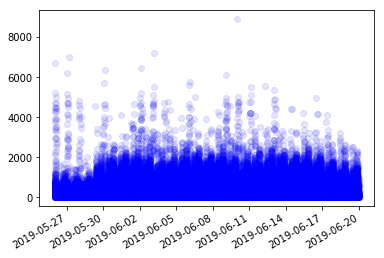

In [62]:
#And let's get visualizing!
fig, ax = plt.subplots()
ax.plot(df_proj['NEXT_YEAR_PROJECTION'], df_proj['FTRAFFIC'], 'bo', alpha=.1)

fig.autofmt_xdate()

ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

In [63]:
def get_time_chunk(date_time_object):
    dow = date_time_object.strftime('%A')
    noon = date_time_object.replace(hour=12, minute=0, second=0)
    if date_time_object.time() < noon.time() :
        dow += ' Morning'
    else :
        dow += ' Afternoon'
    return dow

In [64]:
#Break it up into morning + afternoon chunks
df['TIME'] = df['DATE_TIME'].apply(get_time_chunk)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,ENTRIES_COUNT,EXITS_COUNT,FTRAFFIC,NEXT_YEAR_PROJECTION
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,Saturday Morning,REGULAR,6650004,2254188,2018-06-09 04:00:00,29.0,6.0,35.0,2019-06-09 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,Saturday Morning,REGULAR,6650022,2254209,2018-06-09 08:00:00,18.0,21.0,39.0,2019-06-09 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,Saturday Afternoon,REGULAR,6650118,2254289,2018-06-09 12:00:00,96.0,80.0,176.0,2019-06-09 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,Saturday Afternoon,REGULAR,6650332,2254345,2018-06-09 16:00:00,214.0,56.0,270.0,2019-06-09 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,Saturday Afternoon,REGULAR,6650579,2254378,2018-06-09 20:00:00,247.0,33.0,280.0,2019-06-09 20:00:00


In [65]:
#Let's do the groupby
df = df.groupby(['STATION', 'TIME']).sum()
df

ENTRIES        EXITS  ENTRIES_COUNT  \
STATION    TIME                                                           
1 AV       Friday Afternoon     50414399359  38546810896       145916.0   
           Friday Morning       52795392740  41042818351        59543.0   
           Monday Afternoon     53246531078  47078946475       116890.0   
           Monday Morning       53246284582  47078680760        37367.0   
           Saturday Afternoon   53688915613  47513627567        96324.0   
           Saturday Morning     53245524141  47077869704        51488.5   
           Sunday Afternoon     53246108490  47078484262        76004.0   
           Sunday Morning       53245952595  47078314157        45225.0   
           Thursday Afternoon   52946165220  43055264450       153617.5   
           Thursday Morning     52794753452  41042160158        56724.0   
           Tuesday Afternoon    53247078791  47079514605       149135.0   
           Tuesday Morning      55019948959  48821707190        45674.0   
           Wednesday Afternoon  53096616096  45067377702       150851.0   
           Wednesday Morning    57179248018  49582162267        58384.0   
1 AVE      Friday Afternoon     12630533375  13183392360        55670.0   
           Friday Morning       13594880455  14215370209        22258.0   
           Monday Afternoon     12629626709  13182468010        53268.0   
           Monday Morning       12629510014  13182347169        15194.0   
           Saturday Afternoon   12629277658  13182086758        39584.0   
           Saturday Morning     12629195537  13182004845        20289.5   
           Sunday Afternoon     12629441632  13182263954        31278.0   
           Sunday Morning       12629375428  13182194344        19985.0   
           Thursday Afternoon   12630302377  13183158339        54586.0   
           Thursday Morning     13069080948  13615735542        21081.0   
           Tuesday Afternoon    12629845237  13182695106        55110.0   
           Tuesday Morning      13594231241  14214729002        18429.0   
           Wednesday Afternoon  12630073701  13182927647        55807.0   
           Wednesday Morning    12629951434  13182804682        20869.0   
103 ST     Friday Afternoon      4843397470  15260291830       251505.0   
           Friday Morning        5073697312  16396991779       125545.0   
...                                     ...          ...            ...   
YORK ST    Wednesday Afternoon   1234807367   1091526623       104811.0   
           Wednesday Morning     1201954717   1061727725        26714.0   
ZEREGA AV  Friday Afternoon      1459886265     34132064        12818.0   
           Friday Morning        1459839336     34097602        11177.0   
           Monday Afternoon      1459592757     33864312        10850.0   
           Monday Morning        1513514158     35230066         8738.0   
           Saturday Afternoon    1405581436     32425180         8678.0   
           Saturday Morning      1459482889     33769748         5173.5   
           Sunday Afternoon      1459538307     33819632         6667.0   
           Sunday Morning        1459519823     33805812         2990.0   
           Thursday Afternoon    1459814359     34065118        13156.0   
           Thursday Morning      1459765491     34030365        11648.0   
           Tuesday Afternoon     1459665121     33927715        12993.0   
           Tuesday Morning       1459616213     33891914        11762.0   
           Wednesday Afternoon   1459740146     33996888        12663.0   
           Wednesday Morning     1513640426     35344223        12315.0   
ZEREGA AVE Friday Afternoon       477583639       703234         3795.0   
           Friday Morning         477569451       692889         3432.0   
           Monday Afternoon       477496282       622031         3581.0   
           Monday Morning         477482317       611487         3420.0   
           Saturday Afternoon     477469193       597707     

In [ ]:
#And now we'll mess around to get stations as indices
#df = df.reset_index()


In [ ]:
#df = df.groupby(['STATION']).sum()
#df

In [ ]:
#df.to_csv('output.csv')

In [68]:
df.sort_values('FTRAFFIC', ascending=False)

ENTRIES         EXITS  \
STATION         TIME                                              
34 ST-PENN STA  Wednesday Afternoon  107110271112   63370573325   
                Thursday Afternoon   142700676883   73641477303   
                Tuesday Afternoon    107118325161   63379946505   
                Friday Afternoon     106703321923   63018858540   
                Monday Afternoon     107569836214   63842106249   
34 ST-HERALD SQ Wednesday Afternoon  140532343406  169432427908   
                Friday Afternoon     138867424606  167409239825   
                Thursday Afternoon   141314475867  170826119317   
                Tuesday Afternoon    140633816010  169538468285   
GRD CNTRL-42 ST Thursday Afternoon    75037798769   49696272789   
                Wednesday Afternoon   68580701316   49727473370   
                Tuesday Afternoon     68651077938   49760750187   
                Friday Afternoon      75037460903   49693096404   
34 ST-HERALD SQ Monday Afternoon     140642116771  169511886030   
14 ST-UNION SQ  Wednesday Afternoon   42404880112   14519640810   
                Friday Afternoon      42402312627   14520388752   
23 ST           Thursday Afternoon   200734502793  204928909984   
                Wednesday Afternoon  202592119517  206620678469   
14 ST-UNION SQ  Thursday Afternoon    42332501417   14506893042   
                Tuesday Afternoon     42396444407   14514078488   
23 ST           Tuesday Afternoon    200522023812  204882071715   
86 ST           Wednesday Afternoon   79201165940   89348139182   
23 ST           Friday Afternoon     200537663622  204892458207   
86 ST           Tuesday Afternoon     79197355800   89345095736   
                Thursday Afternoon    79156396080   89286816265   
                Friday Afternoon      79192105959   89317771283   
GRD CNTRL-42 ST Monday Afternoon      69322805598   50038500824   
14 ST-UNION SQ  Monday Afternoon      62269141199   20642010150   
34 ST-PENN STA  Saturday Afternoon   107025242557   63250611074   
FULTON ST       Thursday Afternoon   148246322550  151162214891   
...                                           ...           ...   
22 AVE-BAY PKY  Saturday Morning         46514690      24974214   
OXFORD-104 ST   Saturday Morning         46159171      40594315   
E 143 ST        Saturday Morning         39619718      44316772   
MIDDLETOWN ROAD Sunday Morning           81198565      52197445   
ATLANTIC AVE    Saturday Morning         13404086       5682591   
AVE H           Sunday Morning           53965562      41278510   
BROAD CHANNEL   Saturday Morning         54309881      13916837   
NEWARK C        Sunday Morning           91674431      10985847   
75 AVE          Sunday Morning          984425404      10357481   
GREENWOOD-111   Sunday Morning           68778157      43157742   
22 AVE-BAY PKY  Sunday Morning           46524584      24977905   
BAYCHESTER AVE  Sunday Morning          112413456      10015867   
ATLANTIC AVE    Sunday Morning           13412994       5686204   
ROCKAWAY PK 116 Sunday Morning          944126858      95730789   
BEACH 105 ST    Sunday Morning         3214258432      60318597   
E 143 ST        Sunday Morning           39624434      44322770   
OXFORD-104 ST   Sunday Morning           46166115      40596956   
NEPTUNE AVE     Sunday Morning           54974743      22216575   
BROAD CHANNEL   Sunday Morning           54315665      13920456   
ORCHARD BEACH   Friday Afternoon         17232008        984886   
                Monday Afternoon         16324607        932967   
                Thursday Afternoon       16324975        933788   
                Tuesday Afternoon        16324801        933272   
                Wednesday Afternoon      16324884        933469   
                Tuesday Morning          18591554       1059957   
                Sunday Morning           16319835        932490   
                Friday Morning           17231826        984963   
                Monday

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


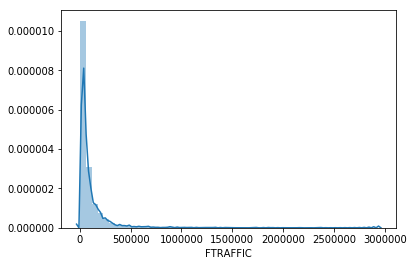

In [66]:
sns.distplot(df['FTRAFFIC'])